In [1]:
import ingestor, modeller, fitter
import numpy as np
import matplotlib.pyplot as plt
import casadi as ca
import pandas as pd

In [16]:
plt.style.use('seaborn-notebook')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
from importlib import reload

reload(ingestor)
reload(modeller)
reload(fitter)

<module 'fitter' from '/media/dwu402/Data/wrap-mad/fitter.py'>

In [3]:
context = ingestor.initialise_context()
ingestor.read_run_file(context, "runs/minimal3.3.run")

In [4]:
model = modeller.Model(context)

In [5]:
solver = fitter.Fitter()
solver.construct_objectives(context, model)

In [59]:
solver.construct_problems()

In [10]:
def supplant(idx, val, arr):
    return arr[:idx] + [val] + arr[idx+1:]

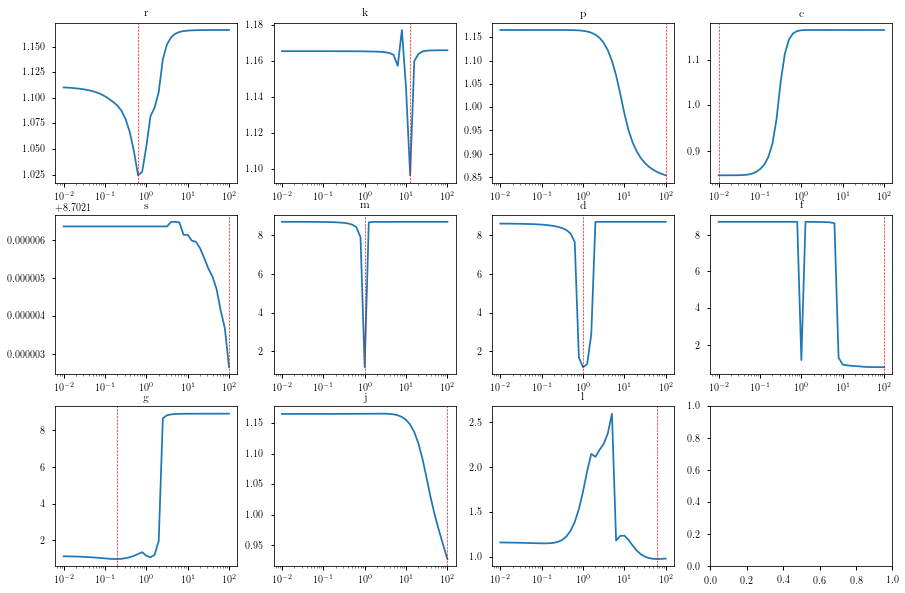

In [60]:
rho = 100

problem = solver.problems[0]

fig, axes = plt.subplots(nrows=3, ncols=4)
flat_axes = axes.flatten()
fn_values = dict()

for idx, parameter in enumerate("rkpcsmdfgjl"):
    fn_values[parameter] = []
    for r in np.logspace(-2, 2, 41):
        fn_val = problem.function(supplant(idx, r, problem.initial_guess), rho=rho)
        fn_values[parameter].append((r, fn_val))

    flat_axes[idx].semilogx(*np.array(fn_values[parameter]).T)
    flat_axes[idx].axvline(x = min(fn_values[parameter], key=lambda x:x[1])[0], color='r', linestyle='--', linewidth=0.65)
    flat_axes[idx].set_title(parameter)

In [43]:
for idx, parameter in enumerate("rkpcsmdfgjl"):
    print(min(fn_values[parameter], key=lambda x:x[1])[0])

0.3389830508474576
13.898305084745761
20.0
20.0
2.3728813559322033
1.3559322033898304
1.0169491525423728
20.0
0.6779661016949152
20.0
1.694915254237288


In [62]:
problem.function(problem.initial_guess, rho=rho)

1.165500962057342